# Prelude

## Import Packages

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%matplotlib ipympl

In [3]:
import functions.init_logger
import logging
logger = logging.getLogger(__name__)
logger.setLevel(logging.CRITICAL)

In [4]:
import functions.add_path
import functions.et_condition_df as condition_df

import functions.et_helper as et_helper
import functions.plotnine_theme
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.subplot.left'] =  0.2
from plotnine import *
from plotnine.data import *


import be_load

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5

2018-10-05 12:09:29 - OpenGL.acceleratesupport                                          - INFO     - No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
reached exception:pyaudio
2018-10-05 12:09:30 - lib.pupil.pupil_src.shared_modules.calibration_routines.optimization_calibration.build - INFO     - Building extension modules...
reached exception:optimization_calibration
2018-10-05 12:09:31 - calibration_routines.optimization_calibration.build               - INFO     - Building extension modules...
reached exception:optimization_calibration
reached exception:glfw.GLFW_PRESS
reached exception:natural_features_calibration
2018-10-05 12:09:32 - calibration_routines.optimization_calibration.build               - INFO     - Building extension modules...
reached exception:optimization_calibration
reached exception:glfw.GLFW_PRESS
reached exception:natural_features_calibration
2018-10-05 12:09:32 - lib.pupil.pupil_src.shared_modules.calibration_routines.optimization_calib

In [5]:
import os
print(os.getcwd())
if os.getcwd()[-4:] != 'code':
    try:
        os.chdir('./code')
    except:
        os.chdir('/net/store/nbp/users/behinger/projects/etcomp/code')


/net/store/nbp/users/behinger/projects/etcomp/lib/pupil/pupil_src/shared_modules/calibration_routines/optimization_calibration


In [6]:
import BLINK
import SMOOTH
import LARGE_GRID
import LARGE_and_SMALL_GRID
import FREEVIEW
import LUM
import MICROSACC
import CALIBRATION

## Which algorithm?

In [7]:
#algorithm = 'hmmnosmooth_'
algorithm = '' # EM-algorithm
#algorithm = 'hmm_'

## Load Data

In [8]:
(etsamples,etmsgs,etevents) = be_load.load_data(algorithm=algorithm)

loading subject VP1 with et el
loading subject VP1 with et pl
loading subject VP2 with et el
loading subject VP2 with et pl
loading subject VP3 with et el
loading subject VP3 with et pl
loading subject VP4 with et el
loading subject VP4 with et pl
loading subject VP11 with et el
loading subject VP11 with et pl
loading subject VP12 with et el
loading subject VP12 with et pl
loading subject VP14 with et el
loading subject VP14 with et pl
loading subject VP15 with et el
loading subject VP15 with et pl
loading subject VP19 with et el
loading subject VP19 with et pl
loading subject VP20 with et el
loading subject VP20 with et pl
loading subject VP22 with et el
loading subject VP22 with et pl
loading subject VP23 with et el
loading subject VP23 with et pl
loading subject VP24 with et el
loading subject VP24 with et pl
loading subject VP25 with et el
loading subject VP25 with et pl
loading subject VP26 with et el
loading subject VP26 with et pl
loading subject results with et el
File b'/net/s

In [9]:
print(etsamples.subject.unique())
print("There are %i subjects"%(etsamples.subject.unique().shape))

['VP1' 'VP2' 'VP3' 'VP4' 'VP11' 'VP12' 'VP14' 'VP15' 'VP19' 'VP20' 'VP22'
 'VP23' 'VP24' 'VP25' 'VP26']
There are 15 subjects


In [10]:
if algorithm == 'hmm':
    # hmm has a very low threshold to detect smooth pursuit. We therefore use for the grid the nosmooth run of hmm
    (etsamples_grid,etmsgs_grid,etevents_grid) = be_load.load_data(algorithm='hmmnosmooth_')
else:
    # in all other cases, the '..._grid' is an alias
    etsamples_grid = etsamples
    etmsgs_grid = etmsgs
    etevents_grid = etevents

In [11]:
%%capture test
raw_large_grid_df = condition_df.get_condition_df(data=(etsamples_grid,etmsgs_grid,etevents_grid),condition='LARGE_GRID')

blink= condition_df.get_condition_df(data=(etsamples,etmsgs,etevents),condition="BLINK")

smooth = condition_df.get_condition_df(data=(etsamples,etmsgs,etevents),condition="SMOOTHPURSUIT")

microsaccades = MICROSACC.detect_microsaccades(etsamples=etsamples,etmsgs=etmsgs,etevents=etevents)

all_lum = LUM.process_lum(etsamples,etmsgs)
all_lum_binned = LUM.bin_lum(all_lum)

# Freeviewing
raw_freeview_df, raw_fix_count_df = condition_df.get_condition_df(data=(etsamples_grid,etmsgs_grid,etevents_grid), condition='FREEVIEW') # loads the detection where all smooth pursuits are defined as fixations

raw_all_grids_df = condition_df.get_condition_df(data=(etsamples_grid,etmsgs_grid,etevents_grid), condition='LARGE_and_SMALL_GRID')

2018-10-05 12:12:33 - functions.et_condition_df                                         - DEBUG    - Data already loaded, just applying transformations
2018-10-05 12:12:34 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP1 
2018-10-05 12:12:35 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP1 
2018-10-05 12:12:36 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP2 
2018-10-05 12:12:37 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP2 
2018-10-05 12:12:38 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP3 
2018-10-05 12:12:39 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP3 
2018-10-05 12:12:40 - functions.et_condition_df   

# Calibration Accuracy

## Load Data

In [86]:
err = pd.DataFrame()

for subject in etsamples.subject.unique():
    err = pd.concat([err,CALIBRATION.pl_accuracy(subject),CALIBRATION.el_accuracy(subject)],ignore_index=True)
err.loc[:,'avg'] = err.avg.astype(float)
err.loc[:,'msg_time'] = err.msg_time.astype(float) 

loading subject VP1
found 7 calibrations
2018-09-07 11:19:06 - camera_models                                                     - INFO     - No user calibration found for camera Pupil Cam1 ID2 at resolution (1280, 720)
2018-09-07 11:19:06 - camera_models                                                     - INFO     - Loading pre-recorded calibration
2018-09-07 11:19:06 - calibration_routines.finish_calibration                           - INFO     - Dismissing 0.48% pupil data due to confidence < 0.60
2018-09-07 11:19:06 - calibration_routines.finish_calibration                           - INFO     - Collected 390 monocular calibration data.
2018-09-07 11:19:06 - calibration_routines.finish_calibration                           - INFO     - Collected 390 binocular calibration data.
2018-09-07 11:19:06 - calibration_routines.calibrate                                    - INFO     - first iteration. root-mean-square residuals: 17.612913834162562, in pixel
2018-09-07 11:19:06 - calibrati

/net/store/nbp/users/behinger/projects/etcomp/lib/pupil/pupil_src/shared_modules/accuracy_visualizer.py:208: RuntimeWarning: invalid value encountered in arccos
  precision = np.sqrt(np.mean(np.arccos(succesive_distances) ** 2))


Mapping..0%
Mapping complete
2018-09-07 11:19:15 - calibration_routines.finish_calibration                           - INFO     - Dismissing 0.40% pupil data due to confidence < 0.60
2018-09-07 11:19:15 - calibration_routines.finish_calibration                           - INFO     - Collected 420 monocular calibration data.
2018-09-07 11:19:15 - calibration_routines.finish_calibration                           - INFO     - Collected 420 binocular calibration data.
2018-09-07 11:19:15 - calibration_routines.calibrate                                    - INFO     - first iteration. root-mean-square residuals: 18.162560720353618, in pixel
2018-09-07 11:19:15 - calibration_routines.calibrate                                    - INFO     - second iteration: ignoring outliers. root-mean-square residuals: 8.54911401591122 in pixel
2018-09-07 11:19:15 - calibration_routines.calibrate                                    - INFO     - used 403 data points out of the full dataset 420: subset is 95.

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/code/CALIBRATION.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  out = pd.concat([out,elcaliberror.iloc[minix]],axis=1)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to 

loading subject VP2
found 0 calibrations
2018-09-07 11:19:36 - camera_models                                                     - INFO     - No user calibration found for camera Pupil Cam1 ID2 at resolution (1280, 720)
2018-09-07 11:19:36 - camera_models                                                     - INFO     - Loading pre-recorded calibration
loading subject VP3
found 0 calibrations
2018-09-07 11:19:59 - camera_models                                                     - INFO     - No user calibration found for camera Pupil Cam1 ID2 at resolution (1280, 720)
2018-09-07 11:19:59 - camera_models                                                     - INFO     - Loading pre-recorded calibration
loading subject VP4
found 0 calibrations
2018-09-07 11:20:19 - camera_models                                                     - INFO     - No user calibration found for camera Pupil Cam1 ID2 at resolution (1280, 720)
2018-09-07 11:20:19 - camera_models                                     

In [87]:
err.subject.unique()

array(['VP1', 'VP2', 'VP3', 'VP4', 'VP11', 'VP12', 'VP14', 'VP15', 'VP19',
       'VP20', 'VP22', 'VP23', 'VP24', 'VP25', 'VP26'], dtype=object)

## Results

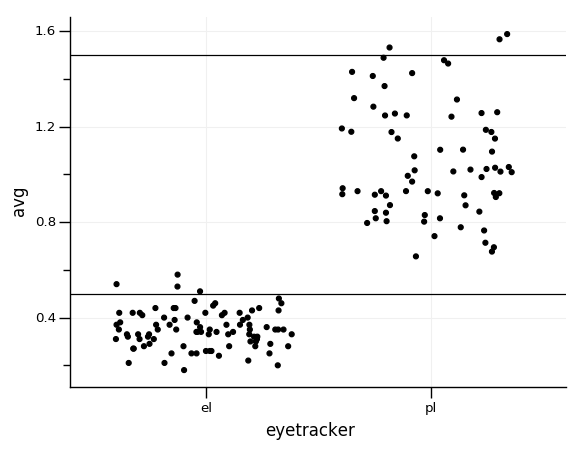

<ggplot: (-9223363271025097966)>

In [88]:
ggplot(err,aes(x="eyetracker",y="avg"))+geom_jitter()+geom_hline(yintercept=[0.5,1.5])#+facet_wrap("~subject")

# Large Grid

## Methods

#### Single Trial view

In [89]:
raw_large_grid_df.iloc[1:2]

,block,element,type,end_time,mean_gx,duration,start_time,rms,mean_gy,condition,exp_event,grid_size,msg_time,posx,posy,hori_accuracy,vert_accuracy,accuracy,et,eyetracker,subject
1,1,3.0,fixation,66.335,36.941557,0.874,65.461,0.050926,14.989577,GRID,element,49.0,64.884,36.412071,15.455667,0.529486,0.46609,0.59821,EyeLink,el,VP1


2018-09-07 11:28:23 - matplotlib.backends                                               - DEBUG    - backend module://ipympl.backend_nbagg version unknown


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


FigureCanvasNbAgg()

<ggplot: (-9223363271024283497)>

2018-09-07 11:28:24 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0 to DejaVu Sans ('/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


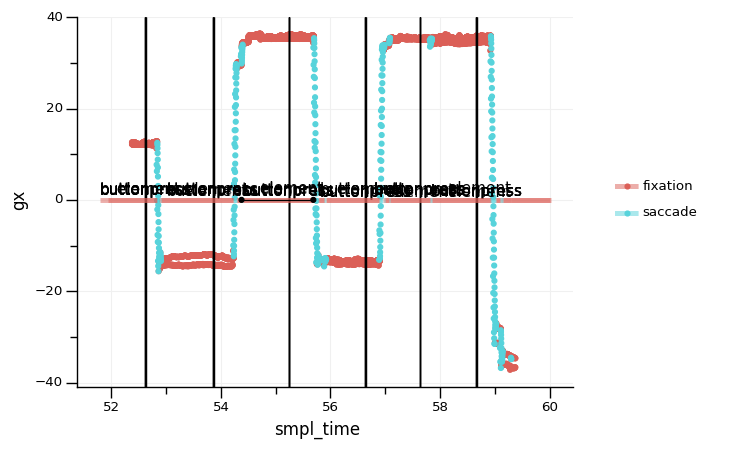

In [98]:
%matplotlib ipympl
from functions import et_helper
et_helper.plot_around_event(etsamples_grid,etmsgs_grid,etevents_grid,raw_large_grid_df.query("eyetracker=='pl'&subject=='VP4'&block=='1'").iloc[5],plusminus=(-2,5))


In [101]:
%matplotlib ipympl
et_helper.plot_around_event(etsamples_grid,etmsgs_grid,etevents_grid,raw_large_grid_df.query("eyetracker=='el'&subject=='VP11'&block=='6'").iloc[9],plusminus=(-2,5))

2018-09-07 11:28:44 - matplotlib.backends                                               - DEBUG    - backend module://ipympl.backend_nbagg version unknown


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


FigureCanvasNbAgg()

<ggplot: (8765831293083)>

In [102]:
%matplotlib inline

2018-09-07 11:28:52 - matplotlib.backends                                               - DEBUG    - backend module://ipykernel.pylab.backend_inline version unknown


## Results

#### Accuracy Table

In [103]:
LARGE_GRID.make_table_accuracy(raw_large_grid_df)

,mean-mean-mean,mean-median-mean,horizontal_accuracy,vertical_accuracy,subject_min_accuracy,subject_max_accuracy,mean_rms
EyeLink,1.15,0.91,0.79,0.82,0.60,1.19,0.04
Pupil Labs,1.71,1.29,1.13,1.19,0.86,1.72,0.23


### Duration and Duration diff

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_density : Removed 72 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_density : Removed 72 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


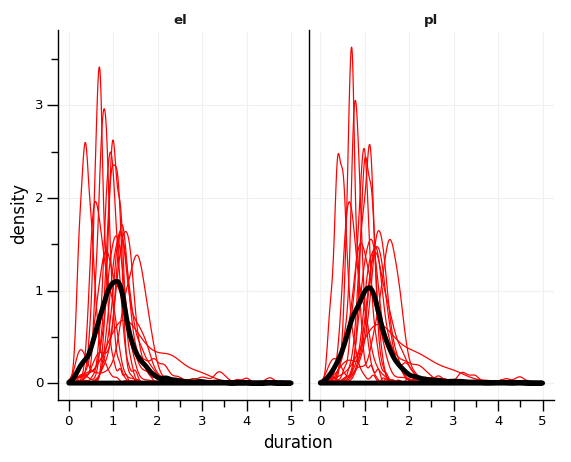

<ggplot: (8765831344967)>

In [104]:
ggplot(raw_large_grid_df,aes(x="duration"))+geom_density(aes(group='subject'),color='red',alpha=0.1)+geom_density(color='black',size=2)+facet_grid("~eyetracker")+xlim([0,5])

In [105]:
def difference_function(x):
    if x.shape[0] == 1:
        return np.nan
    else:
        return np.diff(x)

In [106]:
diff_large_grid_df = raw_large_grid_df.groupby(["element","block","subject"],as_index=False).duration.agg(difference_function)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_density : Removed 371 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_density : Removed 371 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


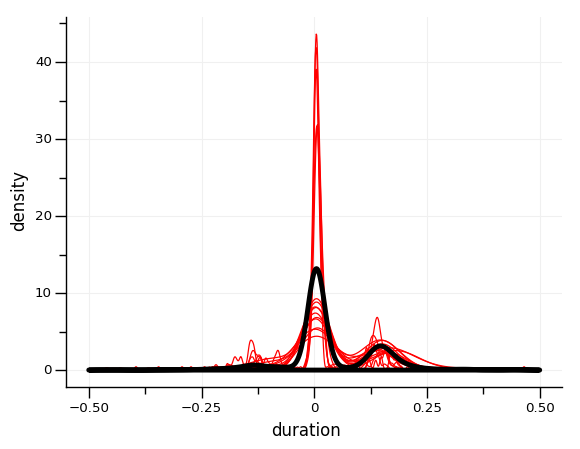

<ggplot: (8765834803909)>

In [107]:
ggplot(diff_large_grid_df,aes(x="duration"))+geom_density(aes(group='subject'),alpha=0.3,color='red')+geom_density(color='black',size=2)+xlim([-0.5,0.5])

In [109]:
raw_large_grid_df.groupby(["subject","eyetracker"],as_index=False).duration.agg("median").groupby("eyetracker").agg("mean")

,duration
eyetracker,
el,1.029200
pl,1.079885


#### Accuracy Plots

2018-09-07 11:29:38 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral ('/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf') with score of 0.050000
2018-09-07 11:29:38 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=STIXSizeOneSym:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXSizeOneSym ('/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf') with score of 0.050000
2018-09-07 11:29:38 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=STIXSizeTwoSym:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIX

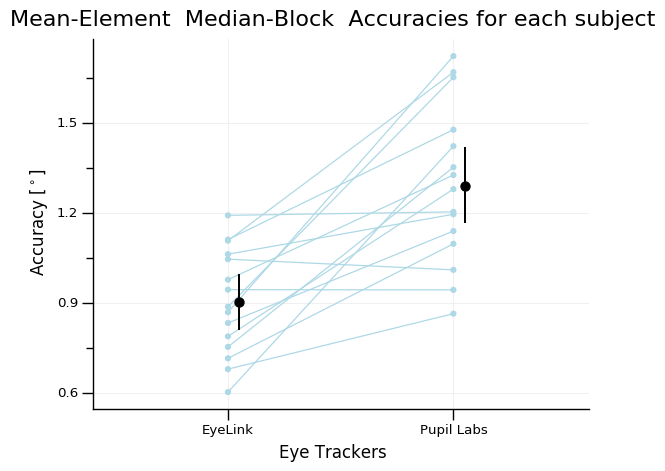

<ggplot: (8765830702179)>

In [111]:
LARGE_GRID.plot_accuracy(raw_large_grid_df)

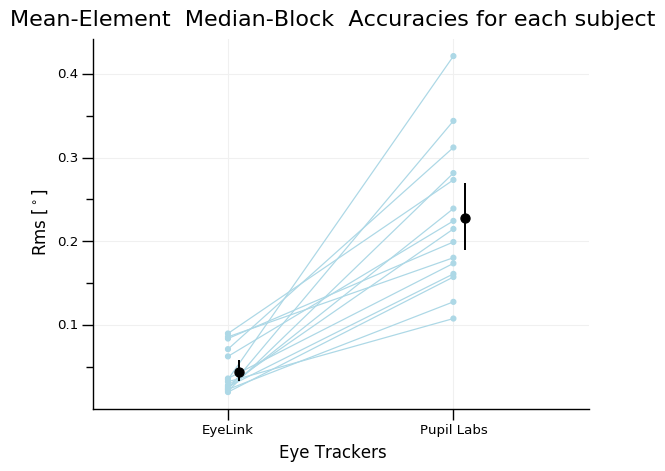

<ggplot: (-9223363271023269828)>

In [114]:
LARGE_GRID.plot_accuracy(raw_large_grid_df,depvar='rms')

#### Single Subject Grid

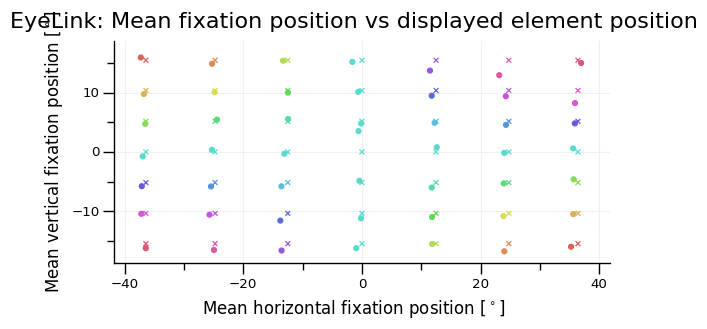

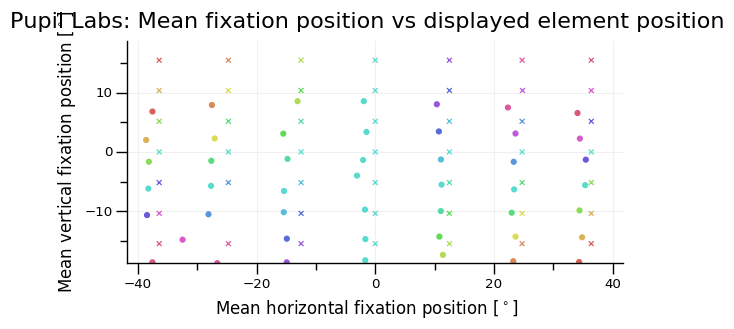

In [116]:
LARGE_GRID.display_fixations(raw_large_grid_df, option='offset',input_subject="VP1",input_block='1')

#### Grid element centered plot

In [193]:
raw_large_grid_df.posy.unique()

array([ -5.16229243,  15.45566657, -10.35600112,  10.35600112,
       -15.45566657,   5.16229243,   0.        ])

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 4 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


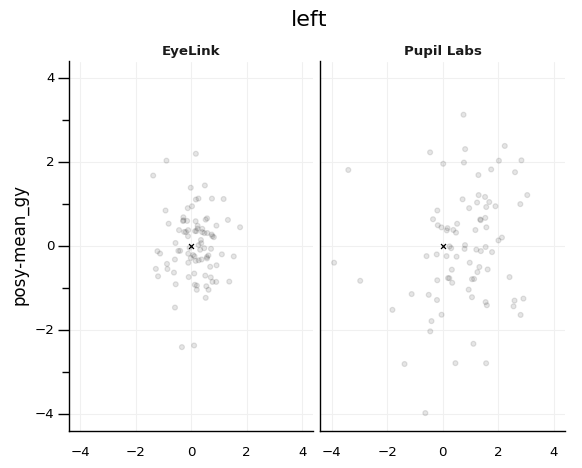

<ggplot: (-9223363271102609436)>

In [210]:
(ggplot(raw_large_grid_df.query('abs(posx+12.49571844)<0.01 & abs(posy)<0.01'), aes(x='posx-mean_gx', y='posy-mean_gy'))
            + geom_point(alpha=0.1)
            # displayed elements
            + annotate("point",x=0, y=0, color='black', shape = 'x')
            + facet_wrap("~et")+xlim((-4,4))+ylim((-4,4))
            + ggtitle('left')
    )

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


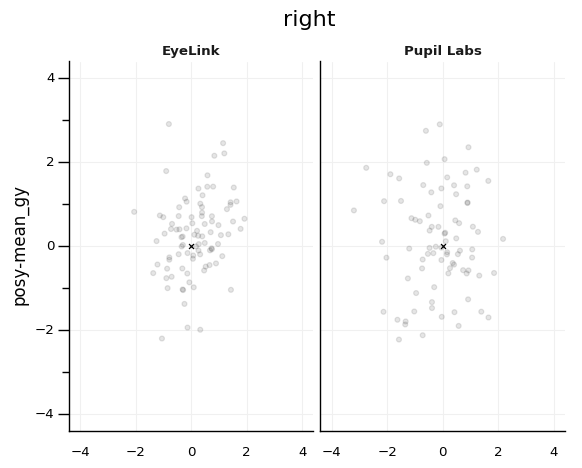

<ggplot: (8765752163511)>

In [209]:
(ggplot(raw_large_grid_df.query('abs(posx-12.49571844)<0.01 & abs(posy-5.16229243)<0.01'), aes(x='posx-mean_gx', y='posy-mean_gy'))
            + geom_point(alpha=0.1)
            # displayed elements
            + annotate("point",x=0, y=0, color='black', shape = 'x')
            + facet_wrap("~et")
            + ggtitle('right')+xlim((-4,4))+ylim((-4,4))

    )

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


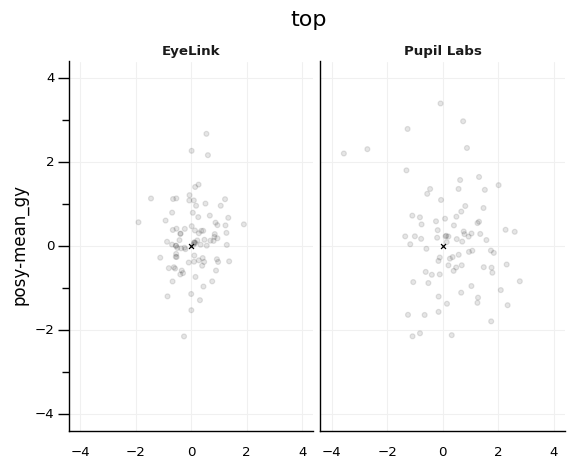

<ggplot: (8765198559559)>

In [206]:
(ggplot(raw_large_grid_df.query('abs(posx)<0.01 & abs(posy-5.16229243)<0.01'), aes(x='posx-mean_gx', y='posy-mean_gy'))
            + geom_point(alpha=0.1)
            # displayed elements
            + annotate("point",x=0, y=0, color='black', shape = 'x')
            + facet_wrap("~et")
            + ggtitle('top')+xlim((-4,4))+ylim((-4,4))

    )

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 4 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


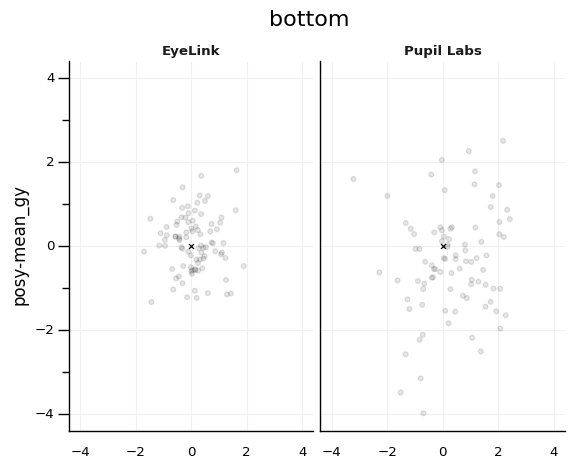

<ggplot: (-9223363271022983231)>

In [207]:
(ggplot(raw_large_grid_df.query('abs(posx)<0.01 & abs(posy+5.16229243)<0.01'), aes(x='posx-mean_gx', y='posy-mean_gy'))
            + geom_point(alpha=0.1)
            # displayed elements
            + annotate("point",x=0, y=0, color='black', shape = 'x')
            + facet_wrap("~et")
            + ggtitle('bottom')
              +xlim((-4,4))+ylim((-4,4))  
    )

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 121 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


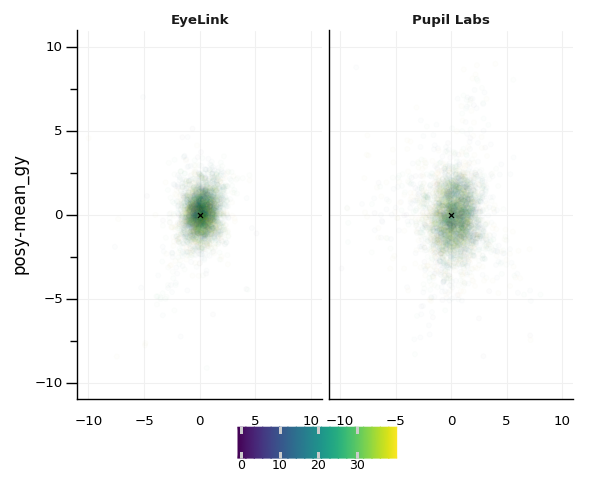

<ggplot: (8765198551693)>

In [208]:
LARGE_GRID.display_fixation_centered(raw_large_grid_df)+xlim((-10,10))+ylim((-10,10))

#### Position vs Accuracy

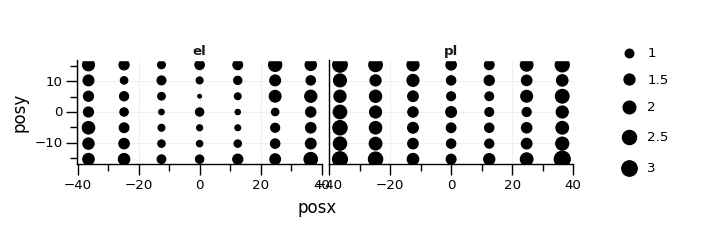

<ggplot: (-9223363271023342525)>

In [118]:
(ggplot(raw_large_grid_df.groupby(['eyetracker','posx','posy'],as_index=False).mean(),aes(x="posx",y="posy",size="accuracy"))+geom_point()+facet_wrap("~eyetracker"))+coord_fixed()

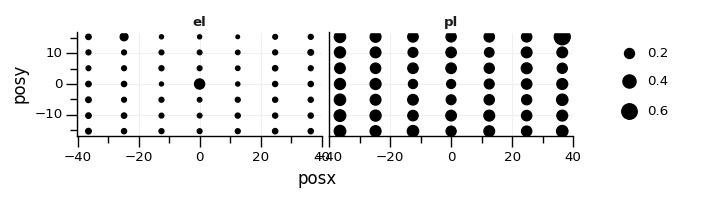

<ggplot: (8765830457534)>

In [119]:
(ggplot(raw_large_grid_df.groupby(['eyetracker','posx','posy'],as_index=False).mean(),aes(x="posx",y="posy",size="rms"))+geom_point()+facet_wrap("~eyetracker"))+coord_fixed()

#### Engbert vs. HMM
This can be thought of a precursor to compare different pupillabs detection algorithms e.g. (3D vs 2D)

In [120]:
if algorithm == '':
    etsamples_engbert = etsamples
    etmsgs_engbert = etmsgs
    etevents_engbert = etevents
    raw_large_grid_df_engbert = raw_large_grid_df
    
    (etsamples_hmm,etmsgs_hmm,etevents_hmm) = be_load.load_data(algorithm='hmmnosmooth_')
    raw_large_grid_df_hmm = condition_df.get_condition_df(data=(etsamples_hmm,etmsgs_hmm,etevents_hmm),condition='LARGE_GRID')
else:
    etsamples_hmm = etsamples
    etmsgs_hmm = etmsgs
    etevents_hmm = etevents
    raw_large_grid_df_hmm = raw_large_grid_df
    
    (etsamples_engbert,etmsgs_engbert,etevents_engbert) = be_load.load_data(algorithm='')
    raw_large_grid_df_engbert = condition_df.get_condition_df(data=(etsamples_engbert,etmsgs_engbert,etevents_engbert),condition='LARGE_GRID')

loading subject VP1 with et el
loading subject VP1 with et pl
loading subject VP2 with et el
loading subject VP2 with et pl
loading subject VP3 with et el
loading subject VP3 with et pl
loading subject VP4 with et el
loading subject VP4 with et pl
loading subject VP11 with et el
loading subject VP11 with et pl
loading subject VP12 with et el
loading subject VP12 with et pl
loading subject VP14 with et el
loading subject VP14 with et pl
loading subject VP15 with et el
loading subject VP15 with et pl
loading subject VP19 with et el
loading subject VP19 with et pl
loading subject VP20 with et el
loading subject VP20 with et pl
loading subject VP22 with et el
loading subject VP22 with et pl
loading subject VP23 with et el
loading subject VP23 with et pl
loading subject VP24 with et el
loading subject VP24 with et pl
loading subject VP25 with et el
loading subject VP25 with et pl
loading subject VP26 with et el
loading subject VP26 with et pl
loading subject results with et el
File b'/net/s

In [121]:
GRID_accuracy_table = pd.concat(
    [LARGE_GRID.make_table_accuracy(raw_large_grid_df_hmm).assign(    algorithm='hmm_nosmooth'),
     LARGE_GRID.make_table_accuracy(raw_large_grid_df_engbert).assign(algorithm='engbert'     )])
GRID_accuracy_table

,mean-mean-mean,mean-median-mean,horizontal_accuracy,vertical_accuracy,subject_min_accuracy,subject_max_accuracy,mean_rms,algorithm
EyeLink,1.26,0.94,0.83,0.85,0.64,1.22,0.05,hmm_nosmooth
Pupil Labs,1.66,1.25,1.10,1.17,0.84,1.77,0.07,hmm_nosmooth
EyeLink,1.15,0.91,0.79,0.82,0.60,1.19,0.04,engbert
Pupil Labs,1.71,1.29,1.13,1.19,0.86,1.72,0.23,engbert


## Statistical Model Tests (Beta)

In [122]:
%load_ext rpy2.ipython
%Rpush raw_large_grid_df

In [123]:
%%R
library(lme4)
raw_large_grid_df$et = factor(raw_large_grid_df$et)
contrasts(raw_large_grid_df$et)=c(-0.5,0.5)
mres <- lmer(accuracy ~ 1+et +  ( 1 + et | subject/block ) ,data = raw_large_grid_df)
summary(mres)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)


Linear mixed model fit by REML ['lmerMod']
Formula: accuracy ~ 1 + et + (1 + et | subject/block)
   Data: raw_large_grid_df

REML criterion at convergence: 41965.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.1569 -0.2201 -0.0710  0.1135 16.5726 

Random effects:
 Groups        Name        Variance Std.Dev. Corr
 block:subject (Intercept) 3.02475  1.7392       
               et1         0.16753  0.4093   0.90
 subject       (Intercept) 0.06848  0.2617       
               et1         0.03625  0.1904   0.29
 Residual                  6.73847  2.5959       
Number of obs: 8766, groups:  block:subject, 90; subject, 15

Fixed effects:
            Estimate Std. Error t value
(Intercept)  1.42605    0.19734   7.226
et1          0.54273    0.08578   6.327

Correlation of Fixed Effects:
    (Intr)
et1 0.478 


In [124]:
%%R
#this cell takes very long to run!

#library(robustlmm)
#rmres <- rlmer(accuracy ~ 1+et +  ( 1 + et | subject/block ) ,data = raw_large_grid_df,verbose=0)
#summary(rmres)

NULL


## Supplementary

2018-09-07 11:38:34 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=14.399999999999999 to DejaVu Sans ('/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


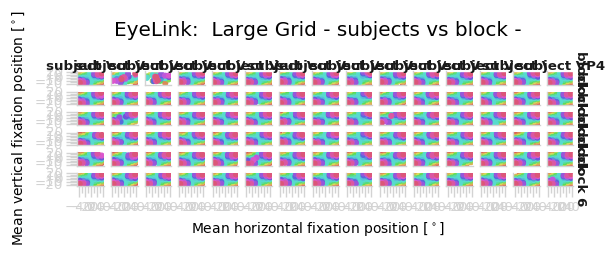

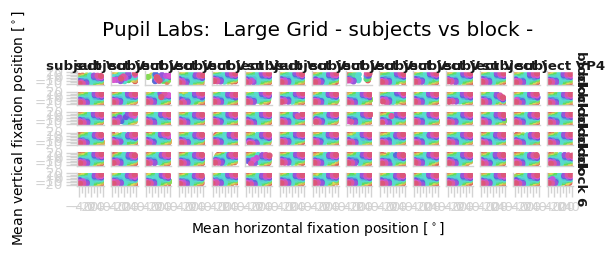

In [125]:
# investigate on the position and properties of detected fixations
LARGE_GRID.display_fixations(raw_large_grid_df, option='fixations')

# Blinks

In [126]:
blink.duration = blink.end_time - blink.start_time

blink.query("duration==0").shape # number of blinks removed because they have duration 0

(19, 36)

In [128]:
blink = blink.query("duration>0") # this removes the eyelin wrong blinks, they are in there since importing the data

## Results

#### Number of Blinks

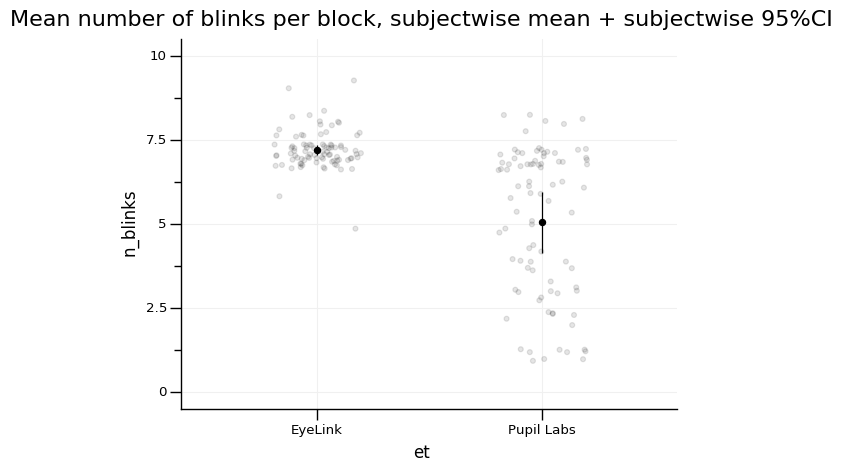

In [129]:
BLINK.plot_count(blink)

#### Duration of Blinks

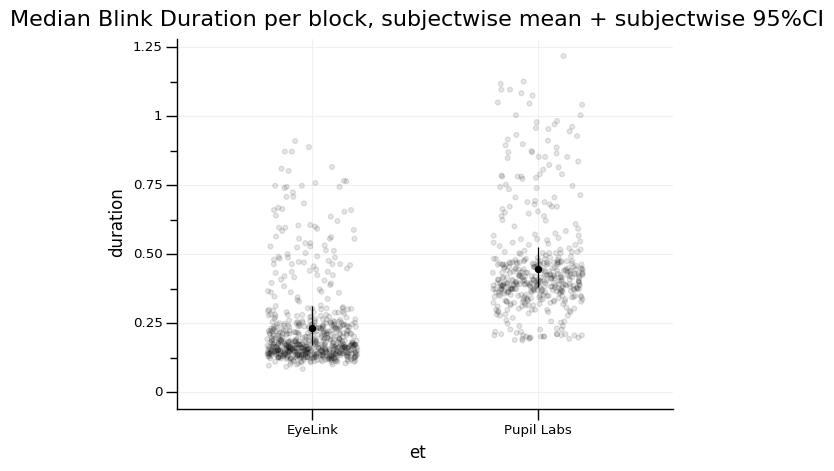

In [130]:
BLINK.plot_duration(blink)

#### Subject-wise number + duration

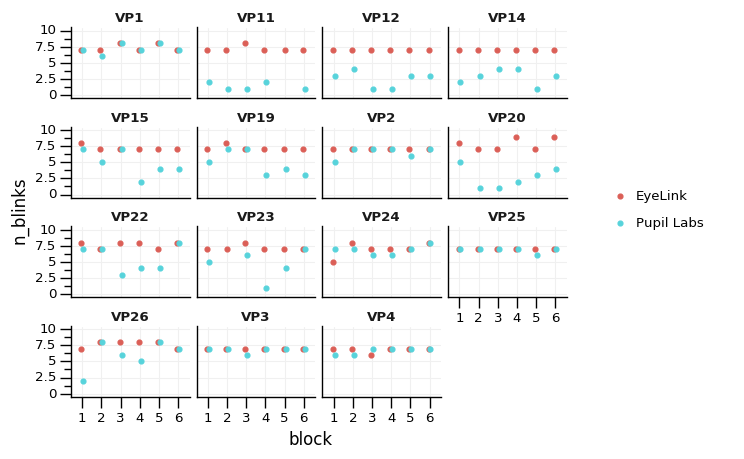

In [131]:
BLINK.plot_count(blink,option="facet_subjects")

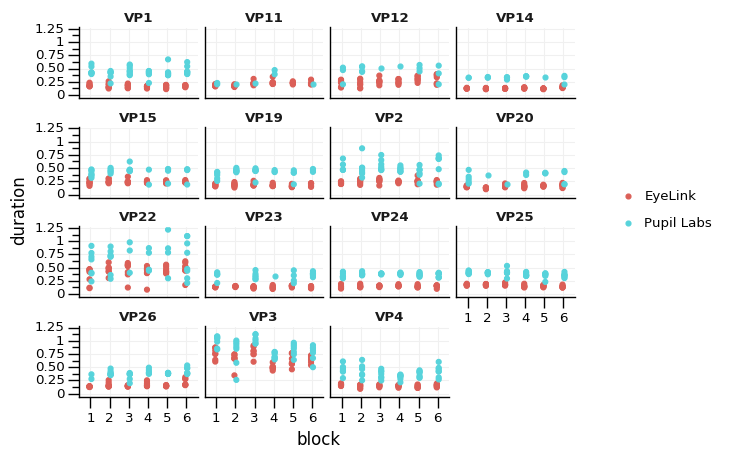

In [132]:
BLINK.plot_duration(blink,option="facet_subjects")

# Smooth Pursuit

## Load Smooth Data

In [133]:
# this loads the bayesian model results
cfg = {'redo':False} # should be specified in the beginning of the notebook
if cfg['redo']:
    smoothresult = SMOOTH.fit_bayesian_model(etsamples,etmsgs,etevents)
    SMOOTH.save_smooth(smoothresult)
else:
    smoothresult = SMOOTH.load_smooth()

## Methods

The model: Changepoint $\tau$ with  $pos  = \beta_{const}$ if $t<\tau$ and $pos = \beta_{const} + time * \beta_{velocity}$ if $t>=\tau$

#### Single Trial Modelfit

In [134]:
smooth_stanmodel = SMOOTH.compileModel() # to facilitate plotting 

2018-09-07 11:39:24 - pystan                                                            - DEBUG    - Successfully parsed Stan model 'anon_model_8875299d4f0849455d5b6cf28abae5ce'.
2018-09-07 11:39:24 - pystan                                                            - INFO     - COMPILING THE C++ CODE FOR MODEL anon_model_8875299d4f0849455d5b6cf28abae5ce NOW.


msg 0 from 1


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


msg 0 from 1


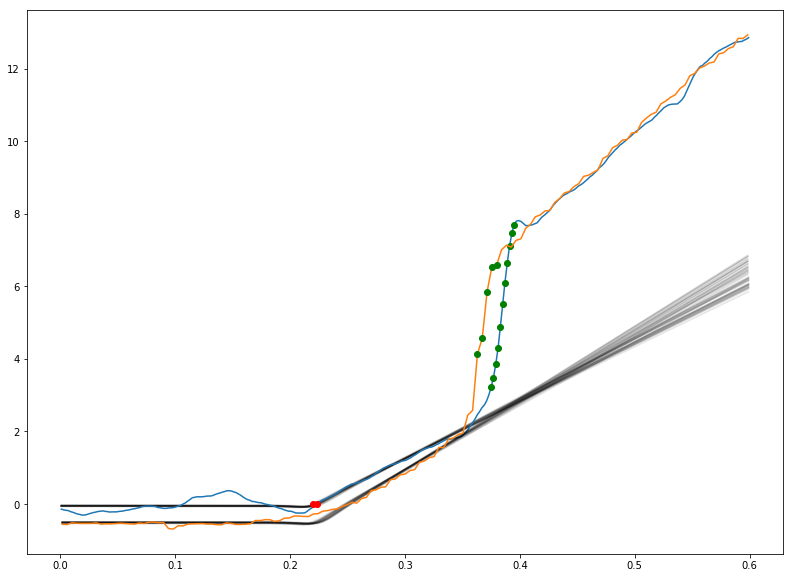

In [187]:
#%matplotlib ipympl
plt.rcParams['figure.figsize'] = [15, 10]
plt.figure()
fitA = SMOOTH.plot_single_trial(etsamples,etmsgs,None,'VP4','el',2,6,smooth_stanmodel) # trial 1, block 1
fitB = SMOOTH.plot_single_trial(etsamples,etmsgs,None,'VP4','pl',2,6,smooth_stanmodel) # trial 1, block 1

msg 0 from 1


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


msg 0 from 1


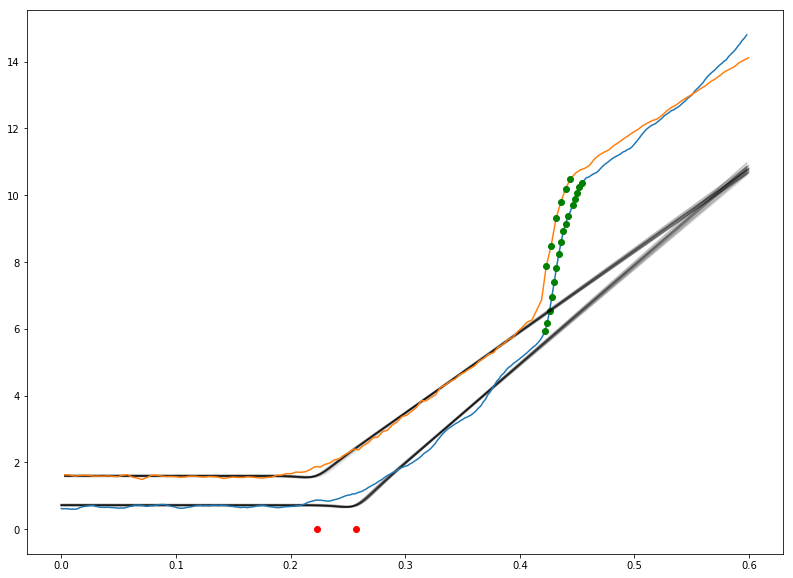

In [149]:
#%matplotlib inline

Main Results follow. First latency, then estimated velocity

## Results

#### Initial Latency

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 3 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


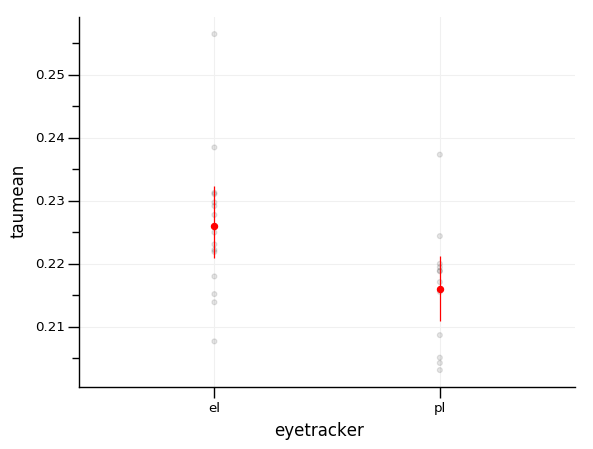

In [137]:
import SMOOTH
%autoreload 2
SMOOTH.plot_modelresults(smoothresult,field="taumean",option="")

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_bin : Removed 3 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


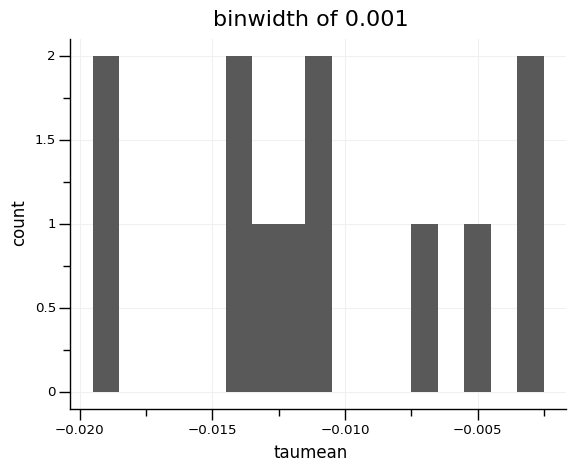

In [138]:
SMOOTH.plot_modelresults(smoothresult,field="taumean",option="difference")

#### Velocity

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 3 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


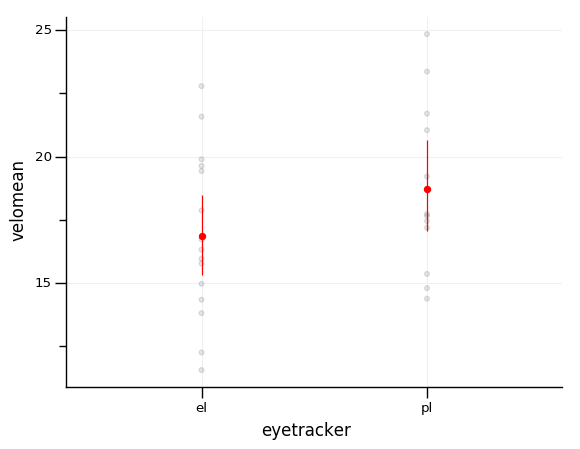

In [139]:
SMOOTH.plot_modelresults(smoothresult,field="velomean",option="")

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_bin : Removed 3 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


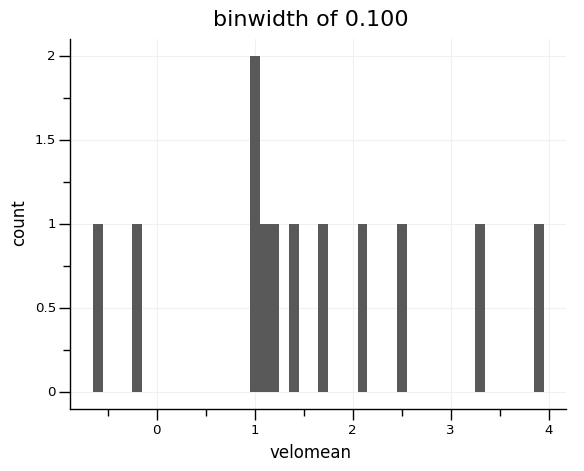

In [140]:
SMOOTH.plot_modelresults(smoothresult,field="velomean",option="difference")

#### Catchup Saccade Amplitudes

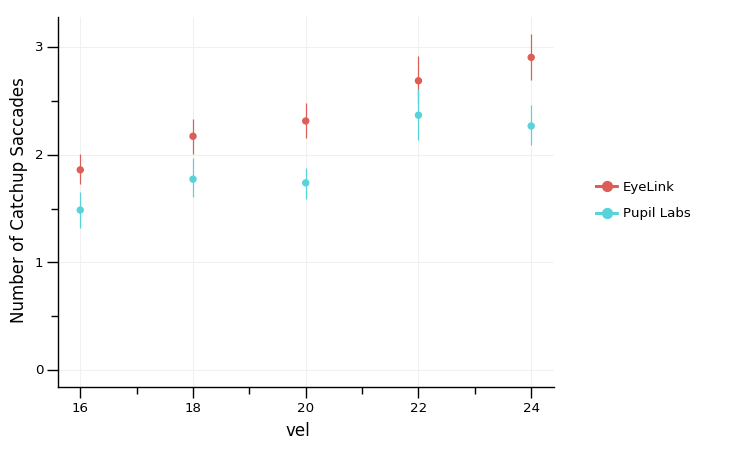

<ggplot: (8765399417622)>

In [141]:
SMOOTH.plot_catchup_amplitudes(smooth)+expand_limits(y = 0)

# Microsaccades

## Results

Index(['eyetracker', 'subject', 'count', 'amplitude mean'], dtype='object')


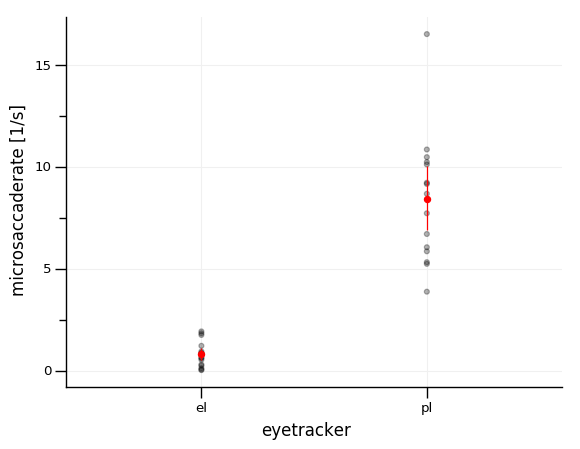

<ggplot: (8765835381319)>

In [151]:
# 6 blocks x 20s
MICROSACC.plot_default(microsaccades,subtype="count/(6*20)")+ylab("microsaccaderate [1/s]")

It is highly unlikely to have ~7 microsaccades per second. Pupillabs eyetracker does not seem able to find microsaccades without tweaking the algorithm.

Index(['eyetracker', 'subject', 'count', 'amplitude mean'], dtype='object')


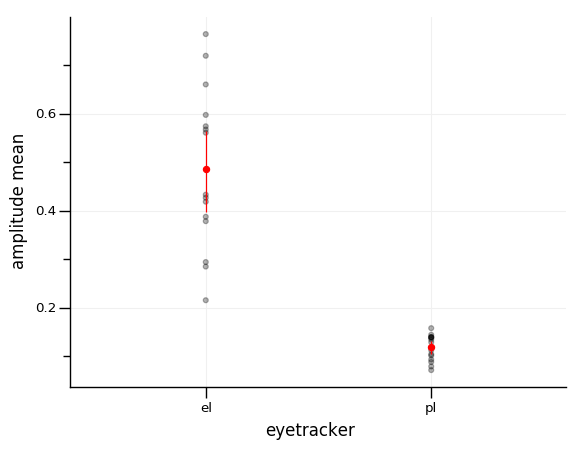

<ggplot: (-9223363271019572199)>

In [152]:
MICROSACC.plot_default(microsaccades,subtype="amplitude mean")

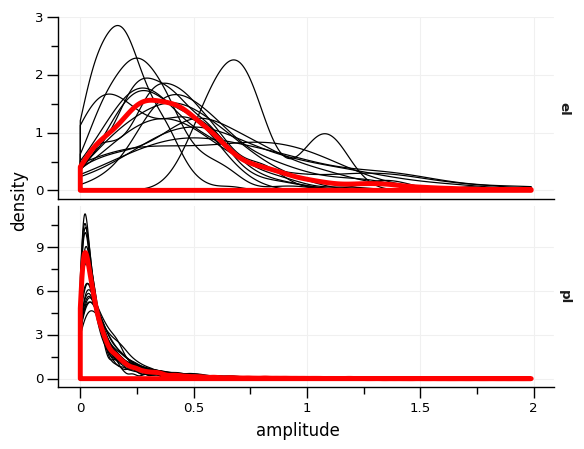

<ggplot: (-9223363271487679428)>

In [153]:
MICROSACC.plot_densities(microsaccades)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


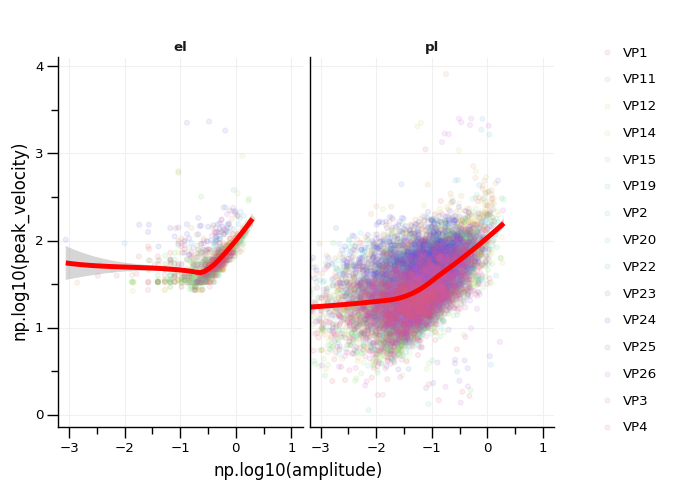

<ggplot: (-9223363271019410074)>

In [154]:
MICROSACC.plot_mainsequence(microsaccades)+coord_cartesian(xlim=(-3,1))

# Pupil Dilation

## Results

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 5520 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_vline : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


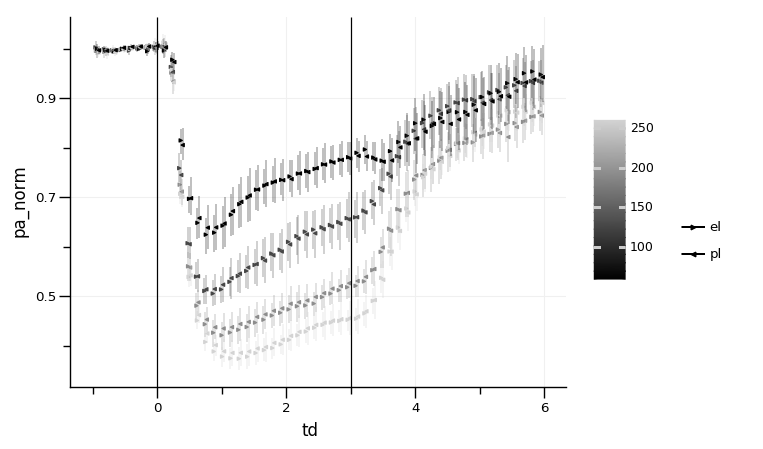

<ggplot: (8765835382820)>

In [155]:
LUM.plot_time_all(all_lum_binned)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/geoms/geom_path.py:75: UserWarning: geom_path: Removed 46 rows containing missing values.
  warn(msg.format(n1-n2))
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_vline : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/guides/guides.py:200: UserWarning: Cannot generate legend for the 'shape' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


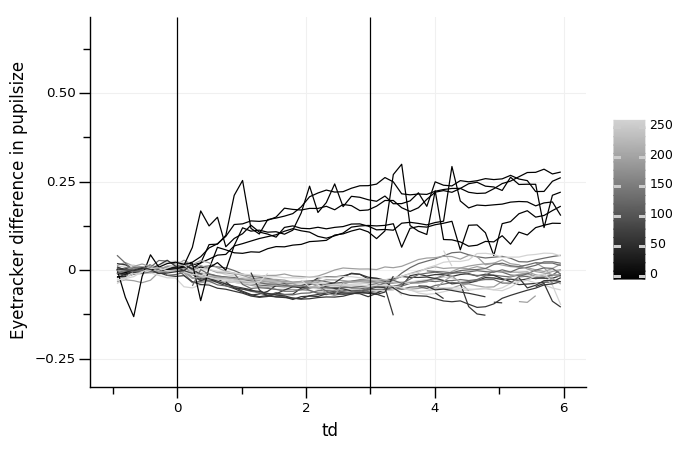

<ggplot: (-9223363271019614769)>

In [156]:
LUM.plot_time_diff(all_lum_binned,subject="VP3")

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 2 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


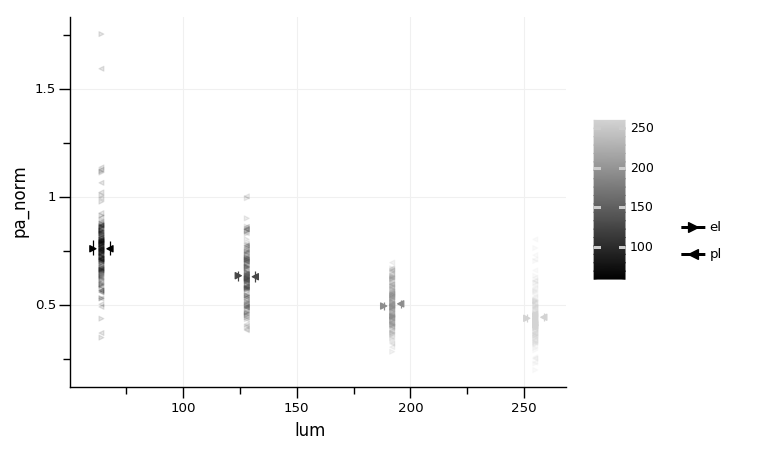

<ggplot: (-9223363271019419953)>

In [157]:
LUM.plot_mean(all_lum)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 10 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


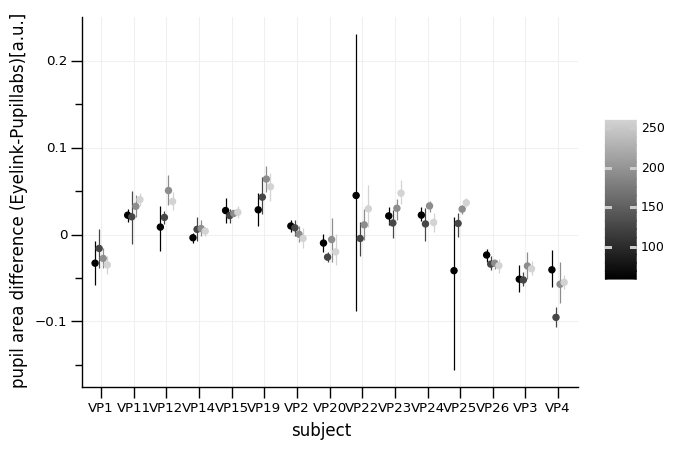

<ggplot: (8765830066829)>

In [158]:
LUM.plot_diff(all_lum)

In [14]:
mean_lum = LUM.calc_mean(all_lum)
diff_lum = mean_lum.query("lum>0").groupby(["lum","block","subject"],as_index=False).pa_norm.agg(np.diff)
diff_lum.loc[:,'pa_norm'] = pd.to_numeric(diff_lum.loc[:,'pa_norm'])
sublist = diff_lum.query("lum>210").groupby("subject").agg("mean").sort_values(by="pa_norm").index

subject_cat = pd.api.types.CategoricalDtype(categories=sublist, ordered=True)

# Cast the existing categories into the new category. Due to a bug in pandas
# we need to do this via a string.
diff_lum.loc[:,'subject'] = diff_lum['subject'].astype(str).astype(subject_cat)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 10 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


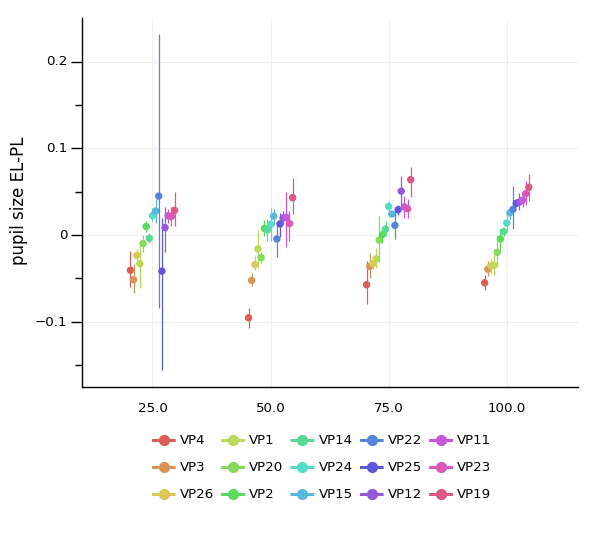

<ggplot: (8765308657363)>

In [289]:
ggplot(diff_lum,aes(x="factor(round(lum/255*100))",y="pa_norm",color="subject",group="subject"))+stat_summary(position=position_dodge(width=0.4))+xlab('luminance [%max]')+ylab("pupil size EL-PL")

### TODO: Fix this and make it available for all subjects.

In [160]:
from functions.detect_saccades import interpolate_gaze
def wrapper_interpolate(x,fs=120):
    print("working on et:%s, subject:%s"%(x.iloc[0]['eyetracker'],x.iloc[0]['subject']))
    tmp = interpolate_gaze(x,fs=fs)
    tmp.loc[:,"eyetracker"] = x.iloc[0]['eyetracker']
    tmp.loc[:,"subject"] = x.iloc[0]['subject']
    return(tmp)
etsamples_100hz = etsamples.query("subject=='VP3'").groupby(["eyetracker","subject"],as_index=False).apply(lambda x:wrapper_interpolate(x,fs=100))

working on et:el, subject:VP3
2018-09-07 11:42:14 - functions.detect_saccades                                         - DEBUG    - Start.... Interpolating Samples
2018-09-07 11:43:27 - functions.detect_saccades                                         - DEBUG    - Done.... Interpolating Samples
working on et:el, subject:VP3
2018-09-07 11:43:27 - functions.detect_saccades                                         - DEBUG    - Start.... Interpolating Samples
2018-09-07 11:44:39 - functions.detect_saccades                                         - DEBUG    - Done.... Interpolating Samples
working on et:pl, subject:VP3
2018-09-07 11:44:39 - functions.detect_saccades                                         - DEBUG    - Start.... Interpolating Samples
2018-09-07 11:45:24 - functions.detect_saccades                                         - DEBUG    - Done.... Interpolating Samples


In [161]:
"pa" in etsamples_100hz.columns

False

In [162]:
etsamples_100hz = etsamples_100hz.query("smpl_time>%.2f"%(max(etsamples_100hz.groupby(["eyetracker"]).smpl_time.agg(min))))

In [163]:
# currently not working
#etsamples_100hz.loc[etsamples_100hz.eyetracker=='el','pa_diff']=etsamples_100hz.query("eyetracker=='el'").pa.values-etsamples_100hz.query("eyetracker=='pl'").pa.values

In [164]:
#currently not working
#ggplot(etsamples_100hz.loc[1:35000].query("eyetracker=='el'"),aes(x="pa",y="pa_diff"))+geom_point()

# Freeviewing

## Results

2018-09-07 11:46:28 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


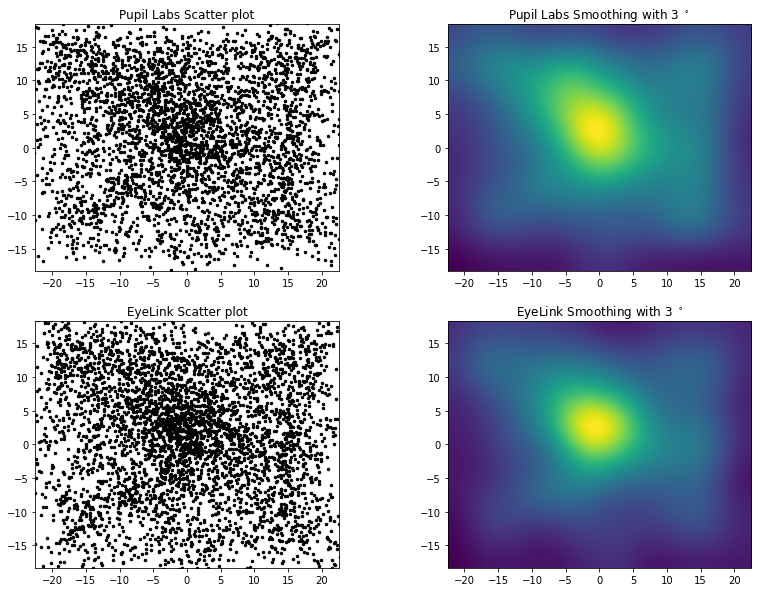

In [165]:
# plot the fixations as a heatmap
# TODO annotation how many fixations from how many pictures are used for each eyetracker
FREEVIEW.plot_heatmap(raw_freeview_df,raw_fix_count_df)

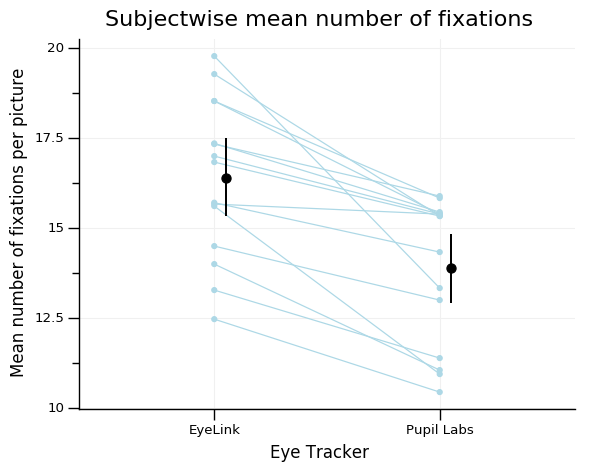

<ggplot: (-9223363271024765040)>

In [166]:
# plot fixation counts
FREEVIEW.plot_number_of_fixations(raw_fix_count_df, option=None)

In [172]:
# plot histogram of the counts
FREEVIEW.plot_histogram(raw_fix_count_df)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_density : Removed 166 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


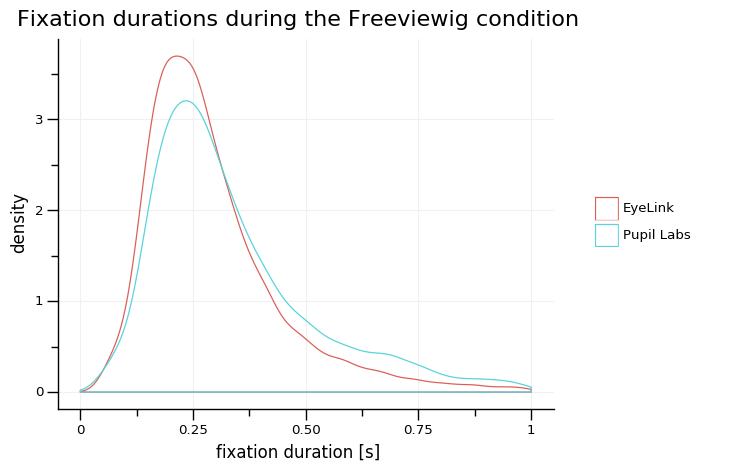

<ggplot: (-9223363271024261930)>

In [173]:
# plot fixation durations
FREEVIEW.plot_fixation_durations(raw_freeview_df)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_density : Removed 166 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


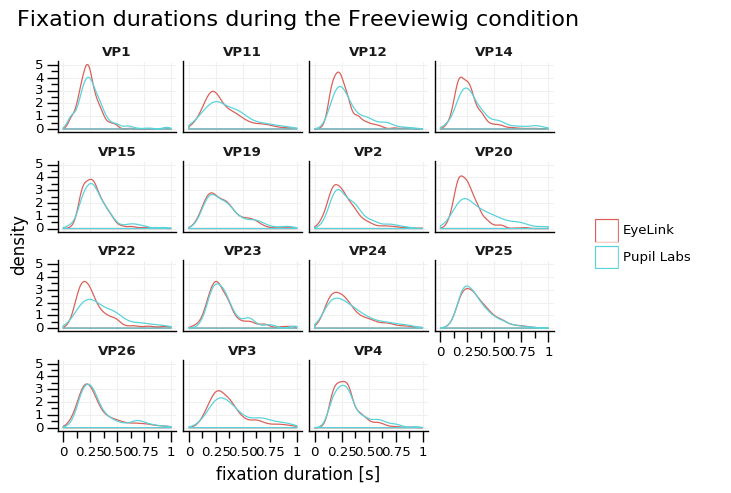

<ggplot: (-9223363271025002773)>

In [174]:
FREEVIEW.plot_fixation_durations(raw_freeview_df, option='facet_subjects')

In [ ]:
# TODO plot main sequence
#FREEVIEW.plot_main_sequence(raw_freeview_df)

# Small Grid

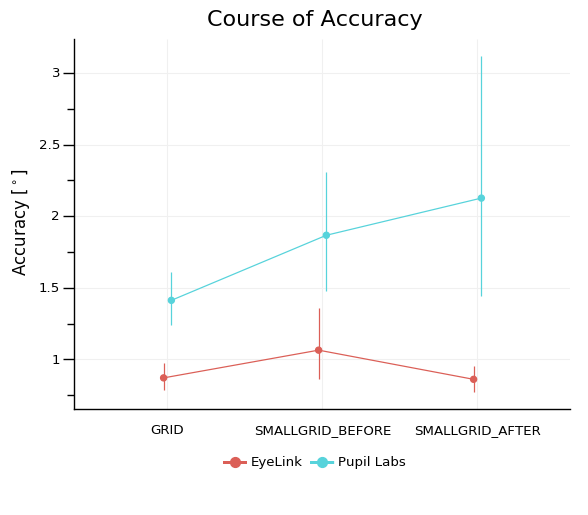

<ggplot: (8765773051049)>

In [179]:
LARGE_and_SMALL_GRID.plot_accuracy(raw_all_grids_df, option='final_figure')

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 1080 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 1080 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


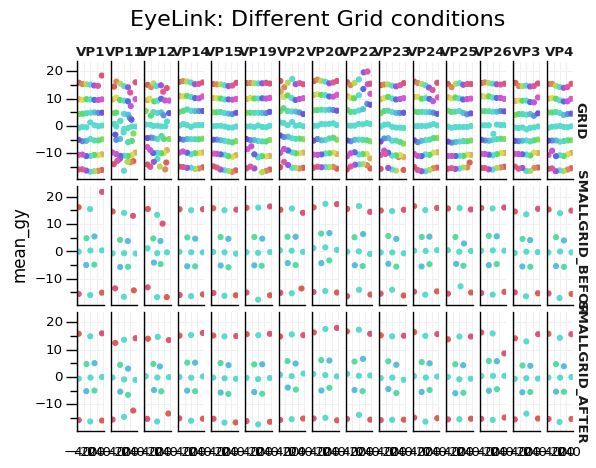

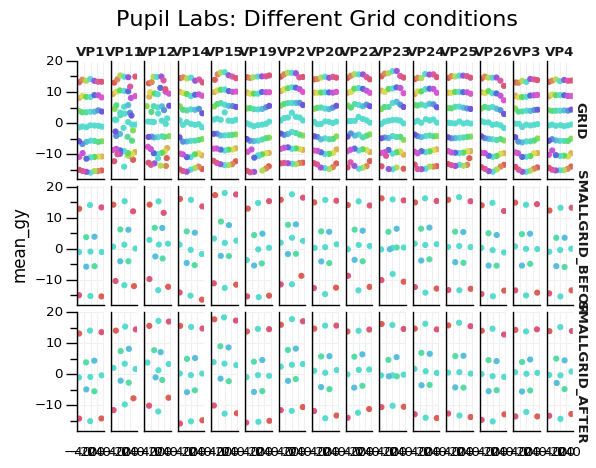

In [180]:
# investigate on the position and properties of detected fixations
LARGE_and_SMALL_GRID.display_fixations(raw_all_grids_df, option='fixations')

# Shake

# Rotate